# HDSP Laboratory: Deep Learning for inverse problem

This laboratory is based on the paper [Deep Learning Techniques
for Inverse Problems in Imaging](https://arxiv.org/pdf/2005.06001.pdf).


1.   Before starting, please read the document


## Inverse problem:

It is the task of reconstructing an unknown signal $x$ (image, voice, multidimensional data), from projected observation $y$. This observation can be modeled with a forward model as 
\begin{equation}
y = A(x) + \epsilon  
\end{equation}
where $A(\cdot)$ is usually non-invertible and ill-posed. Therefore, a unique solution that fits the observations is difficult or impossible without some prior knowledge about the data.



### Exercise 1:

**Example Inverse problems (Super-resolution)**:

The super-resolution problem is an inverse problem where the measurements $y$ is a downsampling version of an image $x$. This problem can be expressed as a linear system where
\begin{equation}
y = Ax  
\end{equation} 

A visual example of this problem is illustrated as follows.

![image for superresoluton](https://revistas.unal.edu.co/index.php/ingeinv/article/viewFile/54267/58903/320116)

*Figure 1: (left) Low-resolution images $y$ (right) High resolution images $x$*




> Assuming a resolution factor of $4$, i.e., $4\times 4$ pixel in the original images are the average of a pixel in the measurements, read an image a made the decimation matrix $A$ to obtain $y$, using $y=Ax$


In [5]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from scipy.sparse import kron

img = cv2.imread('example1.png') # we can visualize the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#--- we need to vectorize the image x

#Lines for vectorize the image  
N = 248
r = 4
x = img[0:248, 0:248]
print(x.shape)

x = x.flatten()
print(x.shape)

# --- We need to build the matrix A  (recomentation: We can use np.kron)
# Lines for bould the linear matrix 

# Create the 1D decimation matrix
M = N // r # size of downsampled signal
v = np.kron(np.eye(M), np.ones((1, r)))
A = np.kron(v, v)
print(A.shape)

# ----- sensing model 
y = np.dot(A,x)
print(y.shape)

#-------- reshape y as a matrix

# Lines for reshape y 
Y_matrix = np.reshape(y, (int(N/r), int(N/r)))

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle("Downsampling inverse problem")                         
ax1.imshow(img)
ax1.set_title('original img')
ax2.imshow(Y_matrix)
ax2.set_title('Downsampled img')

plt.show()

In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

(248, 248)
(61504,)
(3844, 61504)
(3844,)


<Figure size 640x480 with 2 Axes>

# Inverse problem examples

With the growth of available data, deep learning has helped improve the performance of these problems. An example of these is the following.

![texto alternativo](https://d3i71xaburhd42.cloudfront.net/2e88f6c1e560ff4c2823c9bec5d35b9f963a8b0a/3-Figure1-1.png)

![texto alternativo](https://d3i71xaburhd42.cloudfront.net/2e88f6c1e560ff4c2823c9bec5d35b9f963a8b0a/6-Table1-1.png)


# classification of Inverse Problem

The majority of the deep inverse problem can be generalices in the following table
![texto alternativo](https://d3i71xaburhd42.cloudfront.net/2e88f6c1e560ff4c2823c9bec5d35b9f963a8b0a/9-Table2-1.png)


# Forward Model Fully Known During Training and Testing

when the degradation model is known, for example $A$, in the super-resoution model, an initial estimate can be calculated to return to the image dimensions

$$\tilde{x}=A^Ty$$

and this can be used as input of a model

### Dowload the MNIST DATASET


In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, x_labels), (x_test, y_labels) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

Build a decimation matrix with a supe-resolution factor of 2, for the MNIST dataset, i.e., the low-resolution image result of $14\times 14$

do the following operations:


1. reshape de data   
2. y_train = A*x_train
3.   x_estimate = A*y_train
3. reshape de x_estimate as a image



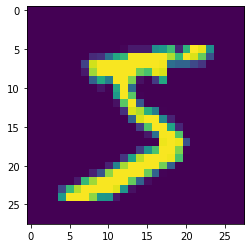

In [6]:
x_ex = x_train[0]
plt.imshow(x_ex)

In [49]:
r=2
img_size = 28
n_samples = x_train.shape[0]
# reshape x_train
print(x_train.shape)
x_train_resized = np.reshape(x_train, (x_train.shape[0], (x_train.shape[1])**2))
print(x_train_resized.shape)

# Get the decimate matrix A 
M = img_size // r
v = np.kron(np.eye(M), np.ones((1, r))) # M, N
A = np.kron(v, v) # size M**2, N**2
print(A.shape)

y_train = np.dot(x_train_resized, np.transpose(A))
print(y_train.shape)

x_estimate = np.dot(y_train, A)

# reshape x_estimate
x_estimate = np.reshape(x_estimate, (n_samples, img_size, img_size))
print("X estimate size:", x_estimate.shape)



(60000, 28, 28)
(60000, 784)
(196, 784)
(60000, 196)
X estimate size: (60000, 28, 28)




1.   check that spatial dimensions of $x_estimate$ are $28x28$
2.   Build a convolutional model, where the input and the output received an image of $28\times 28$




In [75]:

x = tf.keras.Input(shape=(28, 28,))
f = tf.keras.layers.Flatten(input_shape=(28, 28))(x)
d1 = tf.keras.layers.Dense(196, activation='relu')(f)
d2 = tf.keras.layers.Dense(98, activation='relu')(d1)
d3 = tf.keras.layers.Dense(28*28, activation='sigmoid')(d2)
y = tf.keras.layers.Reshape((28, 28))(d3)

model = tf.keras.Model(x, y)
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_7 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               77616     
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 250,782
Trainable params: 250,782
Non-trainable params: 0
____________________________________________________

Now your model must be training using this estimate as input data and the original image as output data.


In [56]:
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-3,
#    decay_steps=10000,
#    decay_rate=0.95)
#optimizad = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mse','mae'])

history = model.fit(x_estimate, x_train, epochs=50, batch_size=100)

Epoch 1/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0867 - mean_squared_error: 0.0867 - mean_absolute_error: 0.1168
Epoch 2/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - mean_absolute_error: 0.0820
Epoch 3/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - mean_absolute_error: 0.0743
Epoch 4/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - mean_absolute_error: 0.0677
Epoch 5/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - mean_absolute_error: 0.0619
Epoch 6/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0569
Epoch 7/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0203 - mean_squared_error: 0.0203 -

### Loss during training

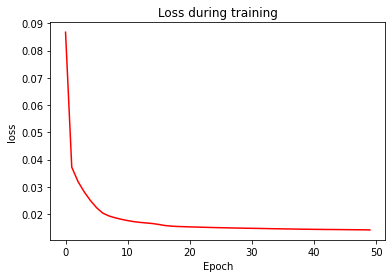

In [57]:
plt.plot(history.history['loss'], "r")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Loss during training")
plt.show()


Evaluate your model with x_test data, (Notice that you need to do the same process, i.e, obtain the initialization)

In [69]:
x_test_resized = np.reshape(x_test, (x_test.shape[0], (x_test.shape[1])**2)) # flatten
print(x_test_resized.shape)

y_test = np.dot(x_test_resized, np.transpose(A))
print(y_test.shape)

x_estimate_test = np.dot(y_test, A)
print(x_estimate_test.shape)

x_estimate_test = x_estimate_test.reshape((10000, img_size, img_size)) # get back to image format
print(x_estimate_test.shape)

x_reconstructed = model.predict(x_estimate_test)
print(x_reconstructed.shape)



(10000, 784)
(10000, 196)
(10000, 784)
(10000, 28, 28)
(10000, 28, 28)


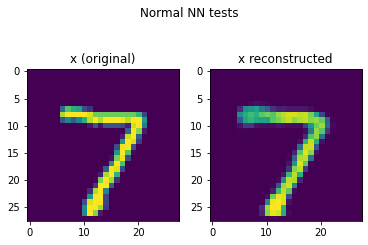

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2)

y_test = np.reshape(y_test, (10000, 14, 14))

fig.suptitle("Normal NN tests")                         
ax1.imshow(x_test[0])
ax1.set_title('x (original)')
ax2.imshow(x_reconstructed[0])
ax2.set_title('x reconstructed')
plt.show()

In [73]:
mae = np.mean(np.abs(x_reconstructed - x_test))
mse = np.sqrt(np.mean(np.abs((x_reconstructed - x_test)**2)))

print("Mean absolute error on test set:", mae)
print("Mean squared error on test set:", mse)

Mean absolute error on test set: 0.040052025772045995
Mean squared error on test set: 0.11710610285443177


# Skip connection NN

well done, you just created your first model to solve an inverse problem. Now you can improve your model using a network with skip connections

![texto alternativo](https://d3i71xaburhd42.cloudfront.net/2e88f6c1e560ff4c2823c9bec5d35b9f963a8b0a/10-Figure7-1.png)

### Skip connection model

In [101]:
x = tf.keras.Input(shape=(28, 28,))
f = tf.keras.layers.Flatten(input_shape=(28, 28))(x)
d1 = tf.keras.layers.Dense(196, activation='relu')(f)
d2 = tf.keras.layers.Dense(98, activation='relu')(d1)
d3 = tf.keras.layers.Dense(28*28, activation='sigmoid')(d2)
d4 = tf.keras.layers.Concatenate()([f, d3])
d1 = tf.keras.layers.Dense(196, activation='relu')(d4)
d3 = tf.keras.layers.Dense(28*28, activation='sigmoid')(d1)
y = tf.keras.layers.Reshape((28, 28))(d3)

skip_model = tf.keras.Model(x, y)
skip_model.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 784)          0           input_7[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 196)          153860      flatten_6[0][0]                  
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 98)           19306       dense_20[0][0]                   
___________________________________________________________________________________________

### Training skip NN

In [102]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-3,
    decay_steps=10000,
    decay_rate=0.95)
optimizad = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

skip_model.compile(optimizer=optimizad, loss='mean_squared_error',metrics=['mse','mae'])

history2 = skip_model.fit(x_estimate, x_train, epochs=20, batch_size=100)

Epoch 1/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0411
Epoch 2/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0262
Epoch 3/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0252
Epoch 4/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0248
Epoch 5/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0245
Epoch 6/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0244
Epoch 7/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0068 - mean_squared_error: 0.0068 -

Text(0.5, 1.0, 'Loss during training of skip NN')

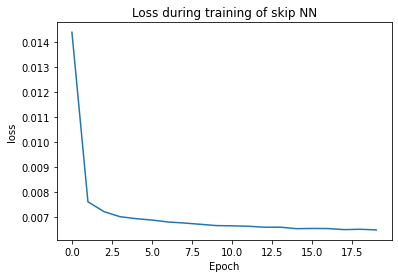

In [103]:
plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Loss during training of skip NN')


### Testing skip NN

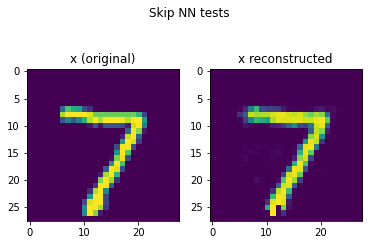

In [104]:
skip_x_reconstructed = skip_model.predict(x_estimate_test)

fig, (ax1, ax2) = plt.subplots(1, 2)

y_test = np.reshape(y_test, (10000, 14, 14))
fig.suptitle("Skip NN tests")                
ax1.imshow(x_test[0])
ax1.set_title('x (original)')
ax2.imshow(skip_x_reconstructed[0])
ax2.set_title('x reconstructed')
plt.show()

In [105]:
skip_mae = np.mean(np.abs(skip_x_reconstructed - x_test))
skip_mse = np.sqrt(np.mean(np.abs((skip_x_reconstructed - x_test)**2)))

print("Mean absolute error on test set:", skip_mae)
print("Mean squared error on test set:", skip_mse)

Mean absolute error on test set: 0.022835857349351684
Mean squared error on test set: 0.07918827328401562


# Questions



1.   What is a inverse problem? \
It is a problem where you want to discover which input caused the output you observe. 

2.   What kind of reverse problem was analyzed in the laboratory? \
Super resolution problem (Find the image at the origin of a subsampled image).

3.  Why the need to use Deep learning in this problem? \
Deep learning allows us to adjust the parameters in order to better estimate the input.

4. How can you improve the performance of your model? \
We can improve the performance of the model by adding skip connexions (concatenating input and hidden layers). That adds more parameters to calculate, but we end to better results (tinier mean absolute and squared error) with less epochs. 



